<a href="https://colab.research.google.com/github/hectormelo/Machine-Learning-Techniques/blob/main/Taller_5/Taller_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://raw.githubusercontent.com/hectormelo/Machine-Learning-Techniques/main/Banner.png" ><br>
# Machine Learning Techniques - MISIS4219

Primer semestre - 2024

## Taller 5

Este taller consta de un punto, el cual se desarrollara implementando todo lo que hemos visto en esta y las anteriores clases.

**Integrante 1: Carlos Raúl de la Rosa Peredo**

**Integrante 2: Jhon Stewar Rayo Mosquera**

**NOTA:** El archivo .pynb entregado debe tener todas las celdas ejecutadas, con los resultados visibles. El nombre del archivo debe ser NombreApellido1_NombreApellido2_TallerS10.ipynb

**Dataset** : Enlace para descargar el dataset: https://drive.google.com/file/d/1C4zZPQcRY52UzgM8z-gzm4dVtSpSaDmw/view?usp=sharing

**Objetivo**: Contruir modelos de deep learning que ayude a clasificar una imagen en alguna de esas 8 clases del dataset (cada folder en el dataset es una categoría). Va a comparar el performance entre una arquitectura densa y Convnets.


## Punto 1: Clasificación de imágenes con arquitectura densa

Requerimientos básicos:
- Divida el dataset en particiones de entrenamiento, validación y testing.
- Proponga una arquitectura de red neuronal densa con al menos 3 capas.
- Entrene el modelo y genere las curvas de loss vs epoch para los sets de entrenamiento y validación.
- Hacer deploy del modelo (realizar prediccion sobre una imagen dada fuera del dataset).
- Evalue el modelo sobre testing y obtenga el reporte de precision, recall  f1-score. Puede utilizar el macro o micro average.

## Punto 2: Clasificación de imágenes con ConvNets

Requerimientos básicos:
- Contruir una red convolucional de al menos 3 capas convolucionales. Utilice las mismas particiones del punto 1.
- Guardar el modelo proveniente de la red convolucional.
- Hacer deploy del modelo (realizar prediccion sobre una imagen dada).
- De ser necesario realizar estrategias de aumentación de datos

## Punto 3: Comparación

Compare los modelos, cual se comporto mejor?, por qué?

# S O L U C I Ó N

### 1.

In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers

from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split

/home/raul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [35]:
files = glob('data/*.jpg')

cates = [i[5:i.find('_')] for i in files]

In [36]:
df_data = pd.DataFrame({'path': files, 'label': cates}) 

df_data.label.value_counts()

label
fruit        1000
person        986
car           968
cat           885
flower        843
motorbike     788
airplane      727
dog           702
Name: count, dtype: int64

In [37]:
df_balanced = pd.concat([df_data.query(f"label=='{c}'").sample(702) for c in df_data['label'].unique()], 
                             ignore_index=True)

df_balanced.label.value_counts()

label
airplane     702
car          702
motorbike    702
flower       702
dog          702
cat          702
fruit        702
person       702
Name: count, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['path'], df_balanced['label'], test_size=0.20, random_state=33)

X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, train_size=0.7, random_state=34)

len(X_train), len(X_test), len(X_val)

(4492, 786, 338)

In [41]:
model = models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

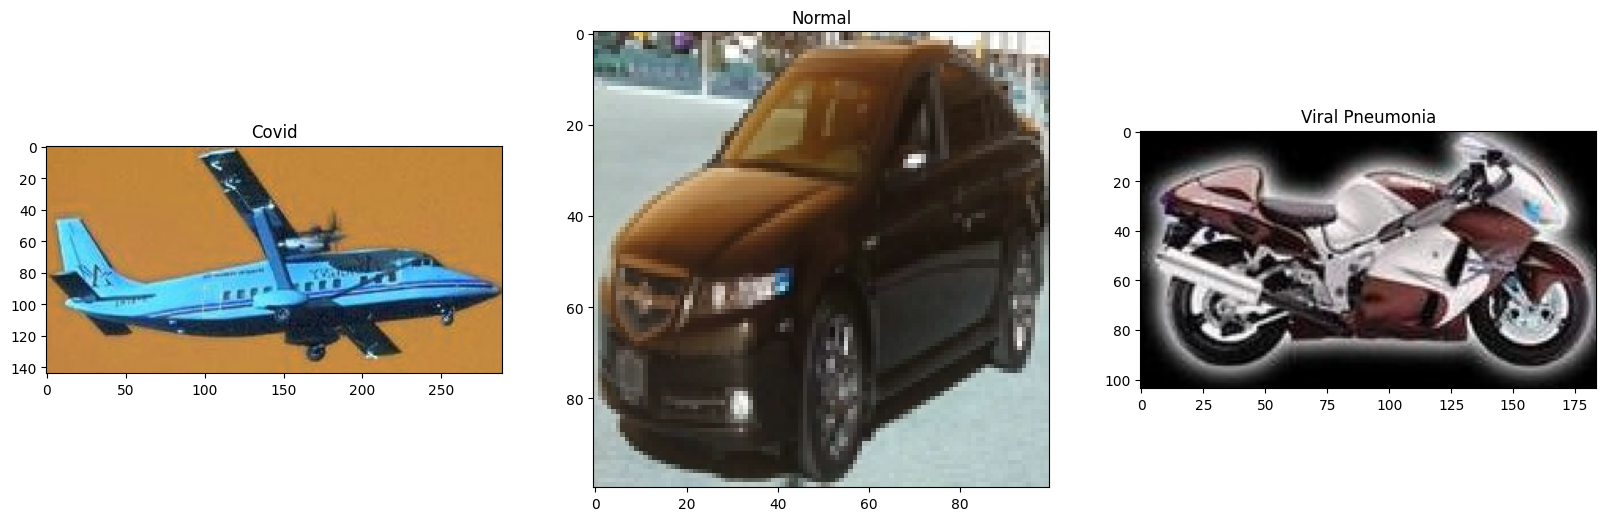

In [43]:
#observamos las imágenes
plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.title('Covid')
plt.imshow(cv2.imread(files[0]))

plt.subplot(1, 3, 2)
plt.title('Normal')
plt.imshow(cv2.imread(files[1]))

plt.subplot(1, 3, 3)
plt.title('Viral Pneumonia')
plt.imshow(cv2.imread(files[2]))

plt.show()